# (Ford go Bike Data Exploration)

## by (Ahmed Saeed)

## Investigation Overview

> In this Investigation i focused on what features affects the Trip duration and when highest no of trips occur .

## Dataset Overview

> The dataset used for this exploratory analysis consists of month individual trip data for February 2019 in CSV format covering the greater San Francisco Bay area, raw data is available here https://www.fordgobike.com/system-data Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
# load in the dataset into a pandas dataframe
df_clean=pd.read_csv('goBike_clean.csv')
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min,start_date,start_hour_day,start_day_week,Age,Age_group
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,26.416667,2019-02-28,23,Thursday,45.0,40-50
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,29.883333,2019-02-28,23,Thursday,60.0,50-60
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,19.116667,2019-02-28,23,Thursday,36.0,30-40
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,26.916667,2019-02-28,23,Thursday,30.0,20-30
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,26.166667,2019-02-28,23,Thursday,31.0,30-40


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Trips Distribution )

> Trip duration in the rides, from about 1 minutes at the lowest, to about 100 minutes at the highest. Plotted on a logarithmic scale.  
As it shown from graph, most of folks have a tendency towards using the bikes for a short-time durational trips (around 10 mins).

In [23]:
# function to plot log scale for one feature
def plot_log(df,col,colname,xlabel,ylabel,title):
    log_binsize = 0.025
    bins = 10 ** np.arange(0, np.log10(col.max())+log_binsize, log_binsize)

    plt.figure(figsize=[8, 5]);
    plt.hist(data = df, x = colname, bins = bins);
    plt.xscale('log');
    plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

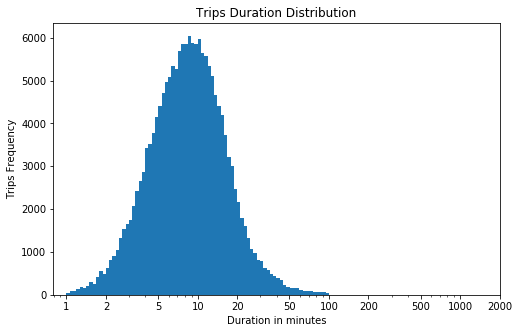

In [24]:
# Trips Duration Distribution 
col = df_clean['duration_min']
colname = 'duration_min'
plot_log(df_clean,col,colname,'Duration in minutes','Trips Frequency','Trips Duration Distribution')

## (Rush hours)

> at 17 and 08 there are rush hours when people going and leaving Work

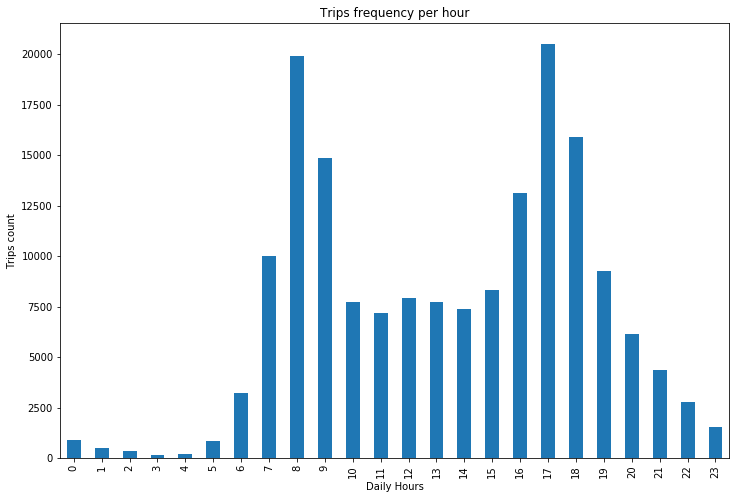

In [20]:
# Rush hours
plt.figure(figsize=[12, 8]);
df_clean.start_hour_day.value_counts(sort=False).plot.bar()
plt.xlabel('Daily Hours')
plt.ylabel('Trips count')
plt.title('Trips frequency per hour');

## (changes in duration over each Hour)

> Trips from 10 to 16 usualy have higher Duration

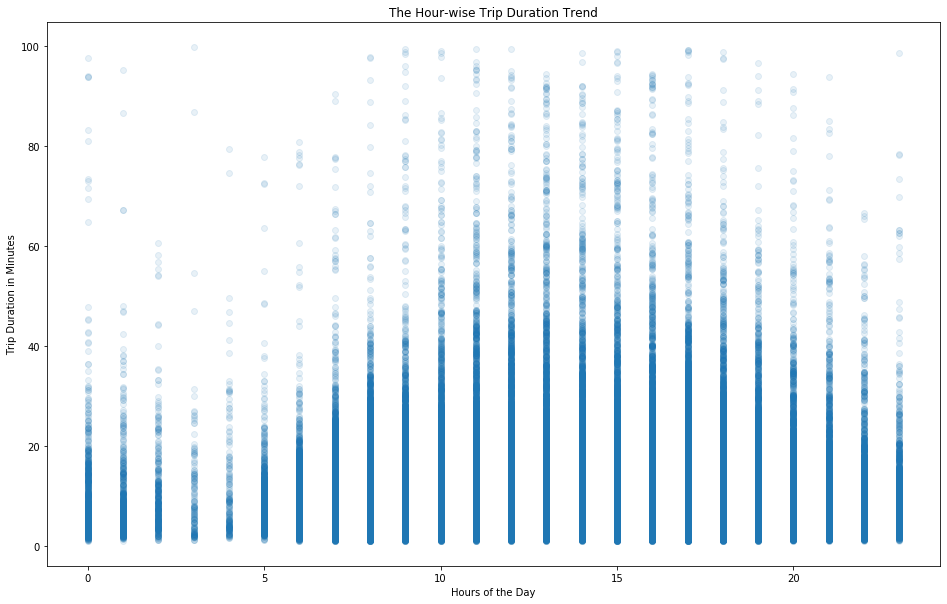

In [9]:
# Here we plot and track the changes in duration over each Hour.

plt.figure(figsize = [16,10]) # Makes the figure enlarged for better visualization 
plt.scatter(data = df_clean , x = 'start_hour_day' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Hour-wise Trip Duration Trend')
plt.xlabel('Hours of the Day')
plt.ylabel('Trip Duration in Minutes')
plt.show();

## (Trips Duration vs Days of the week)

>Trips duration increase on weekends

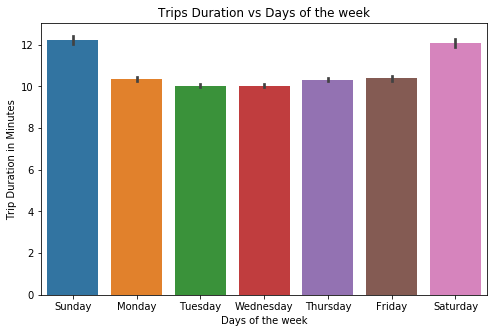

In [12]:
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=[8, 5]);
sb.barplot(x='start_day_week', y='duration_min', data=df_clean,order = days );
plt.title('Trips Duration vs Days of the week')
plt.xlabel('Days of the week')
plt.ylabel('Trip Duration in Minutes')
plt.show();

## (Trips Duration vs Days of the week)

> * In all gender types, the age range of 10-20 and 50-60 has the longest trip duration, this could be teenagers use bikes for goning to school and university.  
* The Most interesting and it was really unexpected is the age group 50-60 have highest Trips duration this because some old people care alot about their health

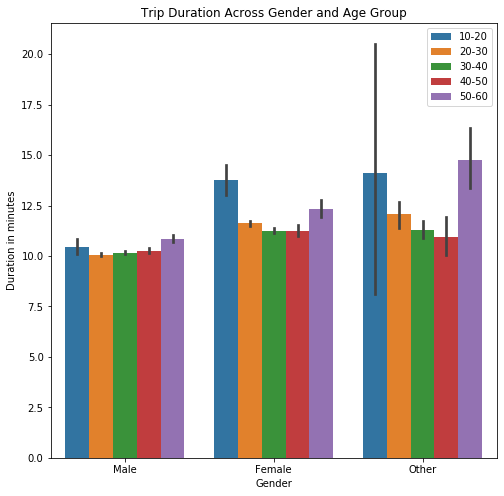

In [13]:
# create bar plot on gender versus duration on levels of the age group variable
plt.figure(figsize = [8, 8])

ax = sb.barplot(x='member_gender', y = 'duration_min', hue='Age_group', data=df_clean.sort_values(by= 'Age_group'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration in minutes')
leg = ax.legend()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert FordGoBike_slide_deck.ipynb --to slides --post serve --template output_toggle